In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/PreProcessed/MixWine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


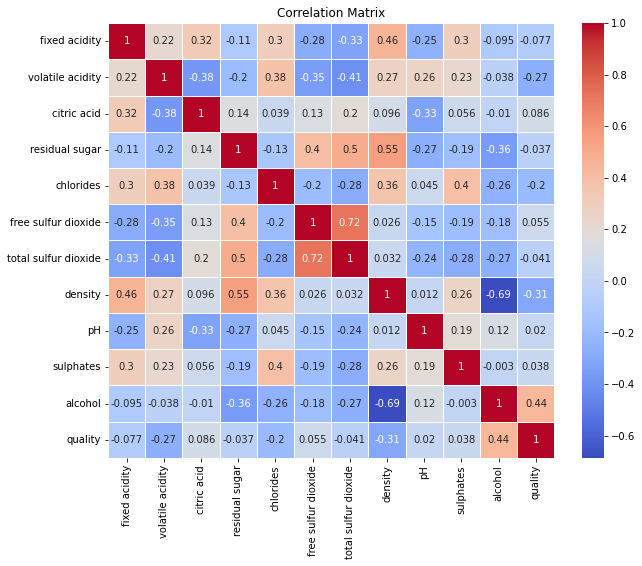

In [3]:
df_ = df.select_dtypes(include=['number'])
corr_matrix = df_.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [4]:
#plt.figure(figsize=(8,8))
#sns.pairplot(df, kind='scatter', hue='wine_name')
#plt.suptitle('Pair Plot', y=1.02)
#plt.show()

We observe joinplots to select features where we could try to extract different cluster that would help us predict the quality of a wine

<Figure size 720x576 with 0 Axes>

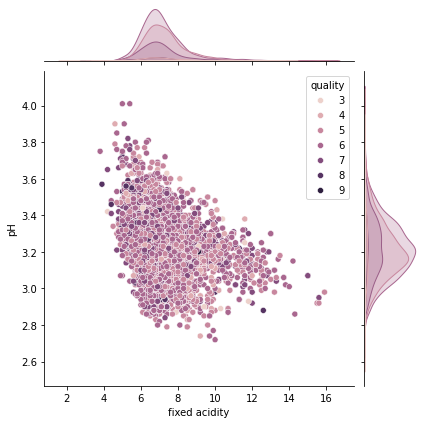

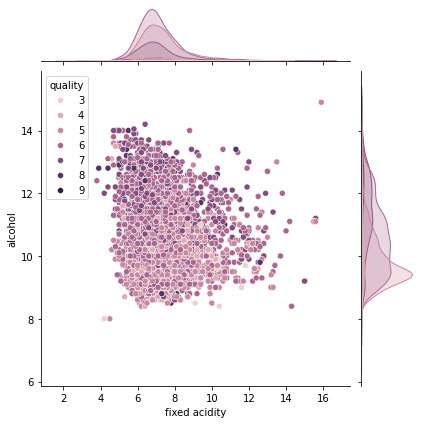

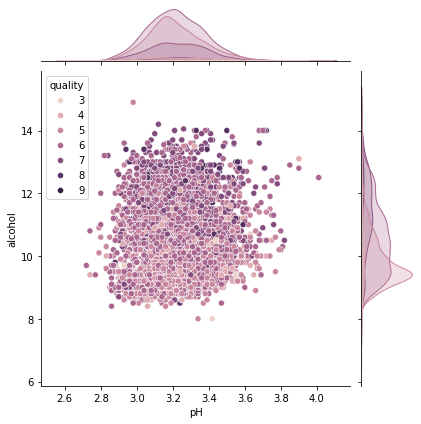

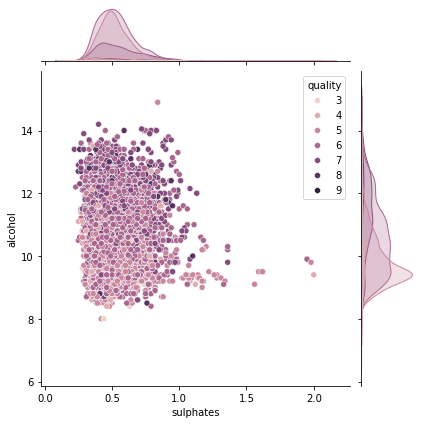

In [5]:
plt.figure(figsize=(10,8))
sns.jointplot(x='fixed acidity',y="pH", data = df, hue = 'quality')
sns.jointplot(x='fixed acidity',y="alcohol", data = df, hue = 'quality') #best ?
sns.jointplot(x='pH',y="alcohol", data = df, hue = 'quality')
sns.jointplot(x='sulphates',y="alcohol", data = df, hue = 'quality')
plt.show()

A jointplot is like a pairplot, plotting data according to 2 different features but adds the distributions of a third features (the target or discrete/ordinal/nominal value)

### EM algo
EM search for gaussian mixture. It will model our data set like n_cluster distributed each like a normal distribution with specific parameters. It will maximize the likelihood by updating the means and the standard deviation of each cluster. It has two steps like the k-means. It returns means and sds. It returns labels such as a hard clustering but can also return probability like a soft clustering

In [6]:
from math import exp, log, sqrt, pi 
from numpy.linalg import inv
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [7]:
df_em = df[['fixed acidity', 'alcohol', 'pH']]
n_cluster = 7 #number of clusters 
gmm = GaussianMixture(n_components=n_cluster, tol = 1e-5, max_iter = 200, init_params='kmeans').fit(df_em)
probs = gmm.predict_proba(df_em) #soft clustering
labels = gmm.predict(df_em) #hardclustering
labels+=3 #to have the clusters labels with the same number than quality
print(gmm.means_)

[[ 7.72103708  9.47210358  3.23107899]
 [ 6.83873871 10.45583052  3.2801814 ]
 [ 6.74543795  9.22302264  3.1166633 ]
 [ 9.35548091 10.83440582  3.24694694]
 [ 7.43787844 10.90537163  3.11395154]
 [ 6.90914086 12.4051534   3.17349522]
 [ 6.1245922  11.37439102  3.33926853]]


Here, we observe the means of each cluster. Fixed acidity, alcohol, pH

In [8]:
counts_quality = df['quality'].value_counts().sort_index()
counts_quality

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [9]:
counts_labels = np.bincount(labels)
counts_labels

array([   0,    0,    0,  867, 2184, 1358,  531,  324,  915,  318])

In [10]:
count_6 = np.count_nonzero(labels == 6)
count_6

531

In [11]:
np.min(labels)

3

/var/folders/h8/y3zthszx42qdg84twgyzjdlr0000gn/T/ipykernel_86957/480118553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_em['labels'] = labels


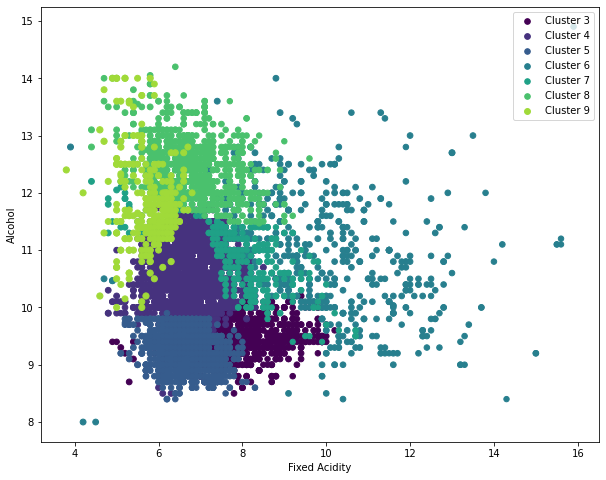

In [12]:
df_em['labels'] = labels
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('viridis')
colors = [cmap(i / n_cluster) for i in range(n_cluster)]

for label, color in zip(np.unique(labels), colors):
    df_pts = df_em[df_em['labels'] == label]
    plt.scatter(df_pts['fixed acidity'], df_pts['alcohol'], label=f'Cluster {label}', color=color, s=df_pts['pH'] *10)

# Ajoutez des étiquettes et une légende au graphique.
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.legend()

# Affichez le graphique.
plt.show()

This plot shows the result of the hard clustering with EM

In [13]:
cluster_3 = df[df_em['labels'] == 3]
cluster_4 = df[df_em['labels'] == 4]
cluster_5 = df[df_em['labels'] == 5]
cluster_6 = df[df_em['labels'] == 6]
cluster_7 = df[df_em['labels'] == 7]
cluster_8 = df[df_em['labels'] == 8]
cluster_9 = df[df_em['labels'] == 9]

In [14]:
#print(cluster_3['quality'].value_counts().sort_index())
for c in range(3, 10):
    cluster_data = df[df_em['labels'] == c]
    value_counts = cluster_data['quality'].value_counts().sort_index()
    print(f"Cluster {c}:")
    print(value_counts)
    print("\n")


Cluster 3:
quality
3      2
4     41
5    485
6    301
7     35
8      3
Name: count, dtype: int64


Cluster 4:
quality
3      12
4      74
5     611
6    1092
7     348
8      47
Name: count, dtype: int64


Cluster 5:
quality
3      2
4     40
5    734
6    489
7     78
8     15
Name: count, dtype: int64


Cluster 6:
quality
3      7
4     14
5    119
6    248
7    130
8     12
9      1
Name: count, dtype: int64


Cluster 7:
quality
3      4
4     22
5     92
6    149
7     49
8      8
Name: count, dtype: int64


Cluster 8:
quality
3      2
4     12
5     53
6    411
7    342
8     91
9      4
Name: count, dtype: int64


Cluster 9:
quality
3      1
4     13
5     44
6    146
7     97
8     17
Name: count, dtype: int64




In [15]:
for c in range(3, 10):
    cluster_data = df[df_em['labels'] == c]
    print(f"Cluster {c}:")
    print(cluster_data.describe())
    print("\n")

Cluster 3:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     867.000000        867.000000   867.000000      867.000000   
mean        7.980969          0.434573     0.297070        5.336275   
std         0.803554          0.206324     0.151198        5.131234   
min         4.900000          0.110000     0.000000        0.800000   
25%         7.500000          0.255000     0.210000        1.900000   
50%         7.900000          0.400000     0.300000        2.500000   
75%         8.500000          0.595000     0.385000        8.600000   
max        10.200000          1.240000     1.000000       31.600000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  867.000000           867.000000            867.000000  867.000000   
mean     0.075271            26.062860            106.267013    0.997102   
std      0.050490            16.902154             61.990770    0.001844   
min      0.030000             1.000000       

Even with features that seemed to sparse the dataset according to quality, the EM algorithm isn't efficient for clustering data and predict quality. The mean quality of the clusters is from 5.2 to 6.5.